# The A-Ci curve and leaf gas-exchange analysis

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by choosing `Trust Notebook` command found in `View` - `Activate Command Palette` menu. Typing in the first letters (i.e. "tr") should give you the command.
</div>

<div class="alert alert-info">
To run the entire code at once, go to 'Run' menu and select 'Run All Cells'. This should run all cells in sequential order. Once a cell is run, you will see a number indicating the order a cell has run in brackets like [1]. If you see [*] next to a cell, that means the cell is still running. Once all cells are run, you can manipulate the sliders to simulate changes in environmental and plant factors that you are intereste in testing and observe how the model is responding the changes you make. 
</div>

In [1]:
using Cropbox

WebIO._IJuliaInit()

In [2]:
using LeafGasExchange

In [3]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

## The A-Ci curve inllustrates the biochemical demand for $\mathrm{CO_2}$, biophysical supply of $\mathrm{CO_2}$, and where they intersect

In order for $\mathrm{CO_2}$ assimilation to take place at the cholorplast, the biochemical demand for $\mathrm{CO_2}$ to run the photosynthetic machinery (the Calvin cycle) must be met by the supply of $\mathrm{CO_2}$ (substrate) from the atmosphere. 

#### $\mathrm{CO_2}$ diffusion equation: The supply function

To reach the site of caboxylation at the choloroplast, $\mathrm{CO_2}$ molecules in the air encouter multiple resistences ($r$) in their diffusional pathway to travel through the leaf boundary layer ($r_b$), stomatal pores ($r_s$), interceullar air-spaces ($r_{ias}$), and mesophyll cell walls ($r_{cw}$)  inside the leaf before dissolving into the liquid phase ($r_{liq}$) and enter the Calvin cycle. These resistences are connected in series along the $\mathrm{CO_2}$ diffusional pathway. Hence, the sum of all resistences determine the total leaf resistence ($r_l$). The last three terms in the pathway (i.e., $r_{ias}, r_{cw}, r_{liq}$) matter only after $\mathrm{CO_2}$ enters into the inside of a leaf. Lumping them together, these terms are referred as the mesophyll resistence ($r_m$).  

$$
{r_t} = {r_b} + {r_s} + {r_m}
$$

While it may make intuititve sense to use the resistence terms in physics, we use conductance ($g$) which is the reciprocal of  resistence in ecophysiology as they better represent biological and physiological agencies that could facilitate or inhibit the diffusion of $\mathrm{CO_2}$ and $\mathrm{H_2O}$ in the pathway. That is, we use $g_b$ for boudary later conductance, $g_s$ for stomatal conductance, and $g_m$ for mesophyll conductance that lumps all internal conductances (i.e., intercellular spaces, cell wall, and liquid phase) together. $g_l$ is the total leaf conductance that combines all counductances in the diffusion pathway. 

$$
\frac{1}{g_l} = \frac{1}{g_b} + \frac{1}{g_s} + \frac{1}{g_m} \approx \frac{1}{g_b} + \frac{1}{g_s}
$$

The gas molecules of $\mathrm{CO_2}$ and $\mathrm{H_2O}$ share the same pathway to go in and out of the leaf but in opposite directions. This is a key for leaf gas-exchange analysis becase we can measure conductances for water vapor and convert them to estimate conductances for $\mathrm{CO_2}$. By default, all conductance terms are for water vapor ($\mathrm{H_2O}$); occaionally a subscript '$w$' will be used to explicitly indicate that a conductance term is for water vapor (e.g., $g_{wl}$). Similarly, We use a subscript '$c$' to specify that certain conductances are for $\mathrm{CO_2}$ (e.g., $g_{cl}$). For conversion to $\mathrm{CO_2}$, stomatal conductance for water vapor ($g_s$ or $g_{ws}$) is divided by 1.6 and boundary layter conductance for water vapor ($g_b$ or $g_{wb}$) is divided by 1.37 to account for the slower diffusion of $\mathrm{CO_2}$ due to heavier molecular weight.

$$
{g_{cs}} =  \frac{g_{s}}{1.6}
$$

$$
{g_{cb}} =  \frac{g_{b}}{1.37}
$$

$$
{g_{cl}} = \frac{g_{cs}g_{cb}}{g_{cs} + g_{cb}}
$$

In steady state, the overall rate of $\mathrm{CO_2}$ flux ($A$) across the entire pathway from the air to the site of carboxylation inside the chloroplast is the same as the rate of $\mathrm{CO_2}$ flux at each segment along the pathway. That is,  

$$
A = g_{cl} (C_a - C_c) = g_{cb}(C_a - C_s) = g_{cs}(C_b - C_i) = g_{cm}(C_i - C_c)
$$

In A-Ci curves, an important assumption is that the mesophyll conductance is infinite (that is, no internal resistence between sub-stomatal cavity and the chloroplast once $\mathrm{CO_2}$ enters a stoma. This means we also assume $C_i$ $\simeq$ $C_c$. Putting these relationships and assumptions together based on the Fick's Law, we get the $\mathrm{CO_2}$ supply function as: 

$$
A = g_{cl} (C_a - C_c) \simeq g_{cl} (C_a - C_i)
$$

#### Biochemical model of C3 photosynthesis (FvCB): The demand function

The $\mathrm{CO_2}$ supplied through the diffusion pathway from the air need to be harvested by Rubsico inside the chlroplast for photosynthesis to take place and to maintain the $\mathrm{CO_2}$ flux through the gradient. The rate of $\mathrm{CO_2}$ harvest (carboxylation) to run the carbon reaction is the rate of $\mathrm{CO_2}$ assimilation, and is governed by three key rate limitating factors in the Calvin Cycle that represent biochemcal demand (or capacity) for photosynthesis: 1) caboxylation efficiency of Rubisco ($A_c$), RuBP regeneration rate ($A_j$), and 3) end product synthesis rate to utlize triose-phoshpages ($A_p$). The actual rate of $\mathrm{CO_2}$ assimilation is determined by the minimum of these three processes which must be met by the supply of $\mathrm{CO_2}$. While we are not going to delve into how each limiting step is modeled, it is worth noting that the main rate limiting processes ($A_c$ and $A_j$)  are modeled using the Michaelis-Menten equation for enzymatic reactions.

$$
A = \min \{ A_c, A_j, A_p \}
$$

$$
A_c = V_{c\!\max} \frac{C_i - \Gamma^*}{C_i + K_c \cdot (1 + {O_i}/{K_o})} - R_d
$$

$$
A_j = \frac{J \cdot (C_i - \Gamma^*)}{4 (C_i + 2 \Gamma^*)} - R_d
$$

$$
A_p = 3T_p - R_d
$$

## Model Preparation

### Setting up configurations

In [4]:
parameters(LeafGasExchange.Weather)

PFD,=,nothing
CO2,=,nothing
RH,=,nothing
T_air,=,nothing
wind,=,nothing
P_air,=,100 kPa


In [5]:
ge_weather = @config :Weather => (
    PFD = 1500,
    CO2 = 425,
    RH = 60,
    T_air = 20,
    wind = 2.0,
)

PFD,=,1500
CO2,=,425
RH,=,60
T_air,=,20
wind,=,2.0


In [6]:
ge_spad = @config :Nitrogen => (
    SNa = 0.0004,
    SNb = 0.0120,
    SNc = 0,
    SPAD = 60,
)

SNa,=,0.0004
SNb,=,0.012
SNc,=,0
SPAD,=,60


In [7]:
ge_C3stomata = @config (
    :StomataTuzet => :WP_leaf => -0.5,
    :StomataBallBerry => (g0 = 0.01, g1 = 10.0,)
    )

WP_leaf,=,-0.5
g0,=,0.01
g1,=,10.0


In [8]:
ge_C4stomata = @config (
    :StomataTuzet => :WP_leaf => -0.5,
    :StomataBallBerry => (g0 = 0.01, g1 = 5.0,)
    )

WP_leaf,=,-0.5
g0,=,0.01
g1,=,5.0


In [9]:
ge_plot = @config :Plot => :CO2 => 425

CO2,=,425


In [10]:
ge_C3base = @config(
    ge_weather,
    ge_C3stomata,
    ge_spad,
    ge_plot,
)

PFD,=,1500
CO2,=,425
RH,=,60
T_air,=,20
wind,=,2.0
WP_leaf,=,-0.5
g0,=,0.01
g1,=,10.0
SNa,=,0.0004
SNb,=,0.012
SNc,=,0


In [11]:
ge_C4base = @config(
    ge_weather,
    ge_spad,
    ge_C4stomata,
    ge_plot,
)

PFD,=,1500
CO2,=,425
RH,=,60
T_air,=,20
wind,=,2.0
SNa,=,0.0004
SNb,=,0.012
SNc,=,0
SPAD,=,60
WP_leaf,=,-0.5
g0,=,0.01


### Custom Visualization

In [12]:
import Cropbox.Gadfly as G

In [13]:
visualize_ACi(S, targets = [:A_net], Ca = nothing;
    config = (),
    xstep = :Weather => :CO2 => 50:50:1500,
    kw...
) = begin
    c = @config(config)
    R = simulate(S; target = [:Ci, :Ca, :CO2, :gs, :gv, :gvc, targets...], configs = @config(c + !xstep))
    p = plot(R, :Ci, targets; kind = :line, kw...)
    for r in eachrow(deunitfy.(R))
        x1, y1 = r.Ci, r.A_net
        x2, y2 = r.Ca, 0
        m = (y2 - y1) / (x2 - x1)
        f = x -> m * (x - x1) + y1
        if isequal(r.CO2, Cropbox.option(c, :Plot, :CO2))
            theme = G.Theme(default_color = "gray", line_style = [:solid])
            info = 
            "A = $(round(r.A_net, digits=1)) μmol/m^2/s\n
            gwl = $(round(r.gv, digits=3)) mol/m^2/s/bar\n
            gcl = $(round(r.gvc, digits=3)) mol/m^2/s/bar\n
            Ci = Ca - A/gcl\n  = $(r.Ca)-($(round(r.A_net, digits=1))/$(round(r.gvc, digits=3))) = $(round(r.Ci, digits=0)) μbar "
            guide = G.Guide.annotation(
                G.compose(
                    G.context(),
                    G.Compose.text((x1+x2)/2 + 20, (y1+y2)/4, info),
                    G.fontsize(theme.minor_label_font_size),
                )
            )
            G.push!(p[], guide)
        else
            theme = G.Theme(default_color = "white", line_style = [:dot])
        end
        l = G.layer(f, x1, x2, theme)
        G.push!(p[], l)
    end
    p
end

visualize_ACi (generic function with 3 methods)

## A-Ci response simulations

### C3 leaves

Progress: 100%[=========================================] Time: 0:00:06


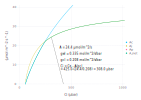

In [14]:
# manipulate(config = ge_C3base, parameters = (
#     :StomataTuzet => :WP_leaf => -3:0.1:0,
#     :Weather      => :PFD     => 0:100:2000,
#     :Weather      => :T_air   => 0:1:50,
#     :Nitrogen     => :N       => 0:0.1:4,
#     :Plot         => :CO2     => 25:25:2000,
        
# )) do c
    visualize_ACi(LeafGasExchange.ModelC3BB, [:Ac, :Aj, :Ap, :A_net];
        config = (ge_C3base, :Weather => (:T_air => 25.0, :PFD => 1500, :RH => 60.0)),
        xstep = :Weather => :CO2 => 25:25:2000,
        xlim = (0, 1000),
        ylim = (0, 40),
    )
#end

### C4 leaves

Progress: 100%[=========================================] Time: 0:00:03


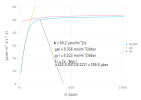

In [15]:
visualize_ACi(LeafGasExchange.ModelC4BB, [:A_net, :Ac, :Aj];
    config = config = (ge_C4base, :Weather => (:T_air => 30.0, :PFD => 2000)),
    xstep = :Weather => :CO2 => 25:25:2000,
    xlim = (0, 1000),
    ylim = (0, 60),
)